In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from ttb import STREAMSDataset

ds = STREAMSDataset("mnist", T=50, num_peaks=5, inference_window=10, duration=4)

In [57]:
benchmark = ds.get_benchmark()

In [58]:
# recovering the train and test streams
train_stream = benchmark.train_stream
test_stream = benchmark.test_stream

# iterating over the train stream
for experience in train_stream:
  print("Start of task ", experience.task_label)
  print('Classes in this task:', experience.classes_in_this_experience)

  # The current Pytorch training set can be easily recovered through the
  # experience
  current_training_set = experience.dataset
  # ...as well as the task_label
  print('Task {}'.format(experience.task_label))
  print('This task contains', len(current_training_set), 'training examples')
  
  print("Train")
  for idx, elem in enumerate(current_training_set):
    print(elem)
    if idx > 10:
      break

  # we can recover the corresponding test experience in the test stream
  current_test_set = test_stream[experience.current_experience].dataset
  print('This task contains', len(current_test_set), 'test examples')
  
  print("Test")
  for idx, elem in enumerate(current_test_set):
    print(elem)
    if idx > 10:
      break

Start of task  0
Classes in this task: [5]
Task 0
This task contains 1 training examples
Train
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE8010640>, 5, 0)
This task contains 10 test examples
Test
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE8FC6670>, 0, 0)
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE90B7DF0>, 4, 0)
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE8145AF0>, 1, 0)
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE8145130>, 9, 0)
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE8145AF0>, 2, 0)
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE90B7D00>, 1, 0)
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE90B7A00>, 3, 0)
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE90B7FA0>, 1, 0)
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE90B7BE0>, 4, 0)
(<PIL.Image.Image image mode=L size=28x28 at 0x7EFCE90B7DF0>, 3, 0)


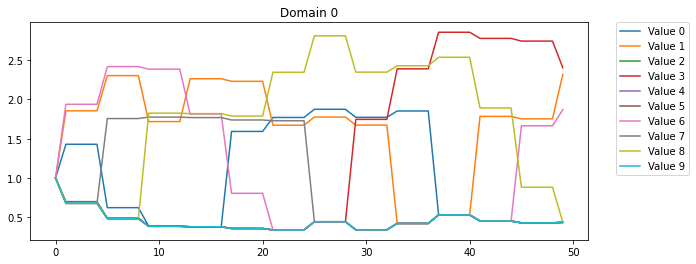

In [59]:
ds.visualize(domain_type_index=0, domain_value_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
len(ds.signals[0])

1

In [75]:
len(ds.signals[0][0])

10